# Supervised Learning

1. ⟨ 3 Marks ⟩ Use Least Square method to find 3 best fit lines using ”Education” as independent and ”Salary”
as dependent variable, ”Occupation” as independent and ”Salary” as dependent variable and ”Experience” as
independent and ”Salary” as dependent variable. Plot the best fit lines for all three case.

In [3306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [3307]:
file_path = "archive/Salary.csv"

# Load the data from the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)


In [3308]:
print (data)

    First Name  Last Name        Education     Occupation  Experience (Years)   
0      Freddie      Smith         Doctoral          Baker                   8  \
1       Robert   Ferguson          Primary      Economist                  12   
2        Adele   Harrison          Primary    Electrician                  17   
3      Miranda  Alexander         Doctoral       Producer                   8   
4        Julia       Cole          Primary     Agronomist                  24   
..         ...        ...              ...            ...                 ...   
195      Oscar   Ferguson         Bachelor       Producer                  29   
196     Arthur      Scott  Upper secondary      Geologist                  19   
197    Abigail      Clark           Master  Mathematician                  24   
198     Harold      Owens  Upper secondary      Geologist                   5   
199       Carl     Walker         Bachelor        Insurer                  15   

     Salary  
0    142875  

In [3309]:
print((data['Experience (Years)'].unique()))

[ 8 12 17 24  3  1 15  7  5 23 14  4 21 26 19 18 16  6 22 10 30 20 28 29
  2 27 13 11 25  9  0]


In [3310]:
df = pd.DataFrame(data)

In [3311]:
discrete_columns = [ 'Occupation' ]

In [3312]:
# Get unique values in the 'Occupation' column
unique_occupations = df['Occupation'].unique()
print(len(unique_occupations))
# Create a mapping of unique values to integers
occupation_mapping = {occupation: idx+1 for idx, occupation in enumerate(unique_occupations)}


51


#### Integer Mapping done for each unique occupation as given below

In [3313]:
print(occupation_mapping)

{'Baker': 1, 'Economist': 2, 'Electrician': 3, 'Producer': 4, 'Agronomist': 5, 'Salesman': 6, 'Police Officer': 7, 'Fine Artist': 8, 'Medic': 9, 'Interior Designer': 10, 'Dancer': 11, 'Insurer': 12, 'Lawer': 13, 'Carpenter': 14, 'Engineer': 15, 'Auditor': 16, 'Photographer': 17, 'Programmer': 18, 'Chemist': 19, 'Meteorologist': 20, 'Veterinarian': 21, 'Graphic Designer': 22, 'Lecturer': 23, 'Botanist': 24, 'Historian': 25, 'Aeroplane Pilot': 26, 'Interpreter': 27, 'Firefighter': 28, 'Chef': 29, 'Hairdresser': 30, 'Astronomer': 31, 'Physicist': 32, 'Jeweller': 33, 'Mathematician': 34, 'Driver': 35, 'Composer': 36, 'Teacher': 37, 'Cook': 38, 'Florist': 39, 'Journalist': 40, 'Scientist': 41, 'Fashion Designer': 42, 'Pharmacist': 43, 'Architect': 44, 'Manager': 45, 'Accountant': 46, 'Geologist': 47, 'Singer': 48, 'Mechanic': 49, 'Social Worker': 50, 'Biochemist': 51}


In [3314]:

# Create a new column 'Occupation_ID' with the mapped values
df['Occupation_ID'] =df['Occupation'].map(occupation_mapping)
## did from 1 to 51


In [3315]:
print(max(df['Occupation_ID'].unique()))
# Now, data['Occupation_ID'] contains the integer mapping for each unique value in the 'Occupation' column


51


In [3316]:
column_values = df['Occupation']
unique_values, value_counts = column_values.unique(), column_values.value_counts()


In [3317]:
print(value_counts)


Occupation
Lawer                9
Engineer             7
Salesman             7
Hairdresser          7
Photographer         6
Cook                 6
Chemist              6
Auditor              6
Insurer              6
Medic                6
Composer             6
Mechanic             5
Firefighter          5
Agronomist           5
Programmer           5
Physicist            5
Historian            5
Lecturer             4
Driver               4
Interpreter          4
Economist            4
Geologist            4
Botanist             4
Graphic Designer     4
Meteorologist        4
Mathematician        4
Carpenter            4
Pharmacist           4
Police Officer       4
Producer             4
Manager              4
Jeweller             4
Teacher              3
Aeroplane Pilot      3
Chef                 3
Veterinarian         3
Dancer               3
Interior Designer    3
Journalist           2
Singer               2
Fashion Designer     2
Fine Artist          2
Architect            2


In [3318]:
# Create custom binary encoding for each discrete column
column_values = df['Education']
# Calculate unique values and their counts
unique_values, value_counts = column_values.unique(), column_values.value_counts()
education_mapping = {education : idx+1 for idx, education in enumerate(unique_values)}
print(education_mapping)
    # Iterate through unique values and print both the value and the number of rows


{'Doctoral': 1, 'Primary': 2, 'Upper secondary': 3, 'Master': 4, 'Bachelor': 5, 'Lower secondary': 6}


In [3319]:
print(value_counts)


Education
Doctoral           42
Bachelor           36
Lower secondary    36
Primary            34
Upper secondary    31
Master             21
Name: count, dtype: int64


Education_encoded has the mapped values of each occupation id of that row in that column

In [3320]:
# Use the map function to create a new column with binary encoded values
df['Education_encoded'] = df['Education'].map(education_mapping)

In [3321]:
# Print the resulting DataFrame to see the encoded values
print(df[['Education', 'Education_encoded']])

           Education  Education_encoded
0           Doctoral                  1
1            Primary                  2
2            Primary                  2
3           Doctoral                  1
4            Primary                  2
..               ...                ...
195         Bachelor                  5
196  Upper secondary                  3
197           Master                  4
198  Upper secondary                  3
199         Bachelor                  5

[200 rows x 2 columns]


In [3322]:
print((data['Occupation'].unique()))


['Baker' 'Economist' 'Electrician' 'Producer' 'Agronomist' 'Salesman'
 'Police Officer' 'Fine Artist' 'Medic' 'Interior Designer' 'Dancer'
 'Insurer' 'Lawer' 'Carpenter' 'Engineer' 'Auditor' 'Photographer'
 'Programmer' 'Chemist' 'Meteorologist' 'Veterinarian' 'Graphic Designer'
 'Lecturer' 'Botanist' 'Historian' 'Aeroplane Pilot' 'Interpreter'
 'Firefighter' 'Chef' 'Hairdresser' 'Astronomer' 'Physicist' 'Jeweller'
 'Mathematician' 'Driver' 'Composer' 'Teacher' 'Cook' 'Florist'
 'Journalist' 'Scientist' 'Fashion Designer' 'Pharmacist' 'Architect'
 'Manager' 'Accountant' 'Geologist' 'Singer' 'Mechanic' 'Social Worker'
 'Biochemist']


In [3323]:
discrete_columns = ['Occupation']

In [3324]:
# Create custom binary encoding for each discrete column
for column in discrete_columns:
    column_values = data[column]
    
    # Calculate unique values and their counts
    unique_values, value_counts = column_values.unique(), column_values.value_counts()

    # Iterate through unique values and print both the value and the number of rows
    
    print(value_counts)

    # Sort unique values based on counts in ascending order
    unique_values = unique_values[np.argsort(value_counts)]
    print("after sorting on basis of row " , unique_values)

    # Create custom binary encoding based on counts
    for i, unique_value in enumerate(unique_values):
        encoding = ['0'] * len(unique_values)
        encoding[i] = '1'
        encoding = ''.join(encoding)
        print('this is encoding for ' , unique_value  , "value is ",  encoding)
        # Create a new column with the custom encoding
        column_name = f'{column}_{unique_value}'
        df[column_name] = (column_values == unique_value).astype(int)


Occupation
Lawer                9
Engineer             7
Salesman             7
Hairdresser          7
Photographer         6
Cook                 6
Chemist              6
Auditor              6
Insurer              6
Medic                6
Composer             6
Mechanic             5
Firefighter          5
Agronomist           5
Programmer           5
Physicist            5
Historian            5
Lecturer             4
Driver               4
Interpreter          4
Economist            4
Geologist            4
Botanist             4
Graphic Designer     4
Meteorologist        4
Mathematician        4
Carpenter            4
Pharmacist           4
Police Officer       4
Producer             4
Manager              4
Jeweller             4
Teacher              3
Aeroplane Pilot      3
Chef                 3
Veterinarian         3
Dancer               3
Interior Designer    3
Journalist           2
Singer               2
Fashion Designer     2
Fine Artist          2
Architect            2


In [3325]:
df.to_csv('modified_salary_data.csv', index=False)

In [3326]:
data = pd.read_csv("modified_salary_data.csv")

In [3327]:
education_salary_max = data.groupby('Education_encoded')['Salary'].max()
print(education_salary_max)

Education_encoded
1    185877
2    194623
3    198022
4    181527
5    186446
6    199768
Name: Salary, dtype: int64


In [3328]:
education_encoded = data['Education_encoded']  # Assuming this is a NumPy array
salary = df['Salary']  # Assuming this is a NumPy array



### for the intercepts

In [3329]:
X = np.column_stack((np.ones_like(education_encoded), education_encoded))


In [3330]:
# Perform OLS 

coefficients = np.linalg.inv(X.T @ X) @ X.T @ salary


Intercept and slope of Education OLS model

In [3331]:
c_ed, m_ed = coefficients[0], coefficients[1]

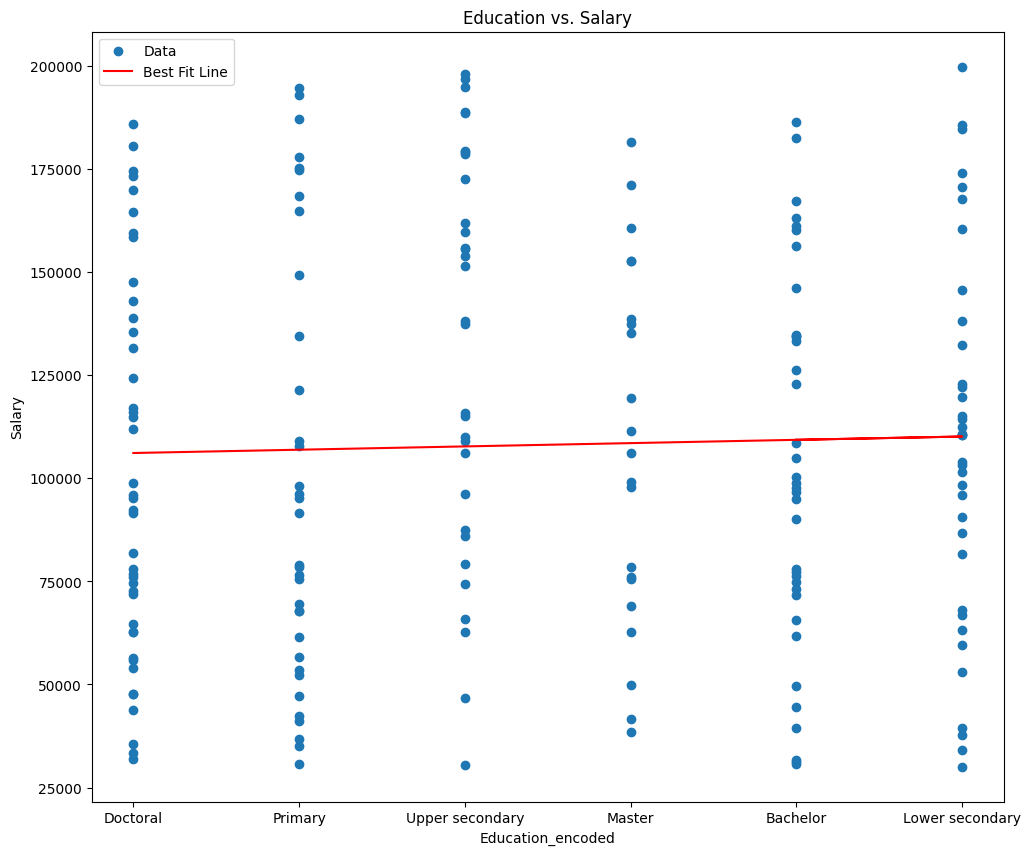

In [3332]:

plt.figure(figsize=(40,10))

plt.subplot(1, 3, 1)
plt.scatter(data['Education_encoded'], data['Salary'], label='Data')
plt.plot(data['Education_encoded'], m_ed * data['Education_encoded'] + c_ed, 'r', label='Best Fit Line')
plt.xlabel('Education_encoded')
plt.ylabel('Salary')
plt.yticks()
plt.xticks(list(education_mapping.values()), list(education_mapping.keys()))  # Set custom x-axis labels

plt.title('Education vs. Salary')
plt.legend()



In [3333]:
unique_occupation_names = data.columns[8:]  # Assuming the 'Occupation' columns start at the 9th column


In [3334]:
X = data[unique_occupation_names].values  # Using the one-hot encoded 'Occupation' columns as independent variables
y = data['Salary'].values  # 'Salary' as the dependent variable


In [3335]:
# Create a design matrix by adding a column of ones for the intercept term
X = np.column_stack((np.ones(len(X)), X))

Performing Multiple Linear Regression on the hot encoded Occupation Columns

In [3336]:
# Perform multiple linear regression
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y


In [3337]:
intercept = coefficients[0]
occupation_coefficients = coefficients[1:]


In [3338]:
print("Intercept:", intercept)
for occupation, coef in zip(unique_occupation_names, occupation_coefficients):
    print(f"{occupation}: {coef:.2f}")



Intercept: 277783.140625
Occupation_Biochemist: 15305.58
Occupation_Accountant: 34055.53
Occupation_Geologist: 109857.84
Occupation_Social Worker: 3504.28
Occupation_Mechanic: 294962.03
Occupation_Singer: -111802.59
Occupation_Manager: 16121.19
Occupation_Architect: -167315.72
Occupation_Pharmacist: 34082.53
Occupation_Fashion Designer: 136280.81
Occupation_Scientist: -327420.88
Occupation_Journalist: -157284.00
Occupation_Florist: -159593.70
Occupation_Jeweller: -425489.38
Occupation_Mathematician: 96673.34
Occupation_Composer: -508415.95
Occupation_Teacher: -367219.09
Occupation_Driver: -389111.45
Occupation_Cook: -152000.31
Occupation_Interpreter: -324745.31
Occupation_Physicist: -252865.94
Occupation_Astronomer: -58927.11
Occupation_Hairdresser: -116318.67
Occupation_Chef: -270199.23
Occupation_Firefighter: -326232.34
Occupation_Aeroplane Pilot: -186772.06
Occupation_Botanist: -141452.91
Occupation_Lecturer: -303135.45
Occupation_Graphic Designer: -49159.16
Occupation_Veterinarian:

In [3339]:
y_pred = X @ coefficients
mse = ((y_pred - y) ** 2).mean()
r2 = 1 - (mse / ((y - y.mean()) ** 2).mean())


In [3340]:
# Print the performance metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 28529382873.266605
R-squared: -11.629198243228045


#### Perform OLS on occupation_id

In [3341]:

experience_encoded = data['Occupation_ID']  


In [3342]:
salary = df['Salary']  
X = np.column_stack((np.ones_like(experience_encoded), experience_encoded))

In [3343]:
# Perform OLS regression
coefficients = np.linalg.inv(X.T @ X) @ X.T @ salary
c_experience, m_experience = coefficients[0], coefficients[1]

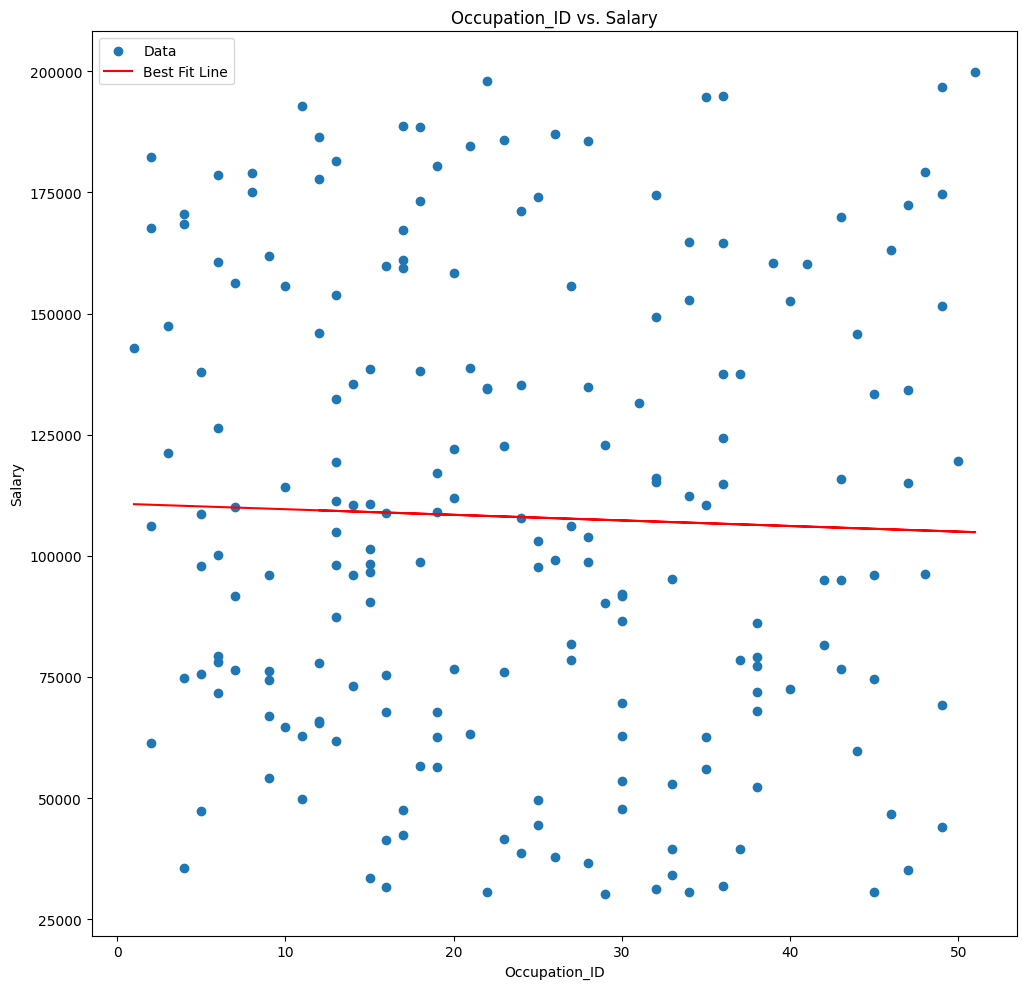

In [3344]:
plt.figure(figsize=(30,10))
plt.subplot(1, 3, 3)
plt.scatter(data['Occupation_ID'], data['Salary'], label='Data')
plt.plot(data['Occupation_ID'], m_experience * data['Occupation_ID'] + c_experience, 'r', label='Best Fit Line')
plt.xlabel('Occupation_ID')
plt.ylabel('Salary')
plt.title('Occupation_ID vs. Salary')
plt.legend()
plt.tight_layout()
plt.show()


## Perform OLS on experience(years) vs Salary

In [3345]:
experience_encoded = data['Experience (Years)']  # Assuming this is a NumPy array
salary = df['Salary']  # Assuming this is a NumPy array


#### For the intercept

In [3346]:
X = np.column_stack((np.ones_like(experience_encoded), experience_encoded))


##### Perform OLS regression


In [3347]:
coefficients = np.linalg.inv(X.T @ X) @ X.T @ salary
c_experience, m_experience = coefficients[0], coefficients[1]


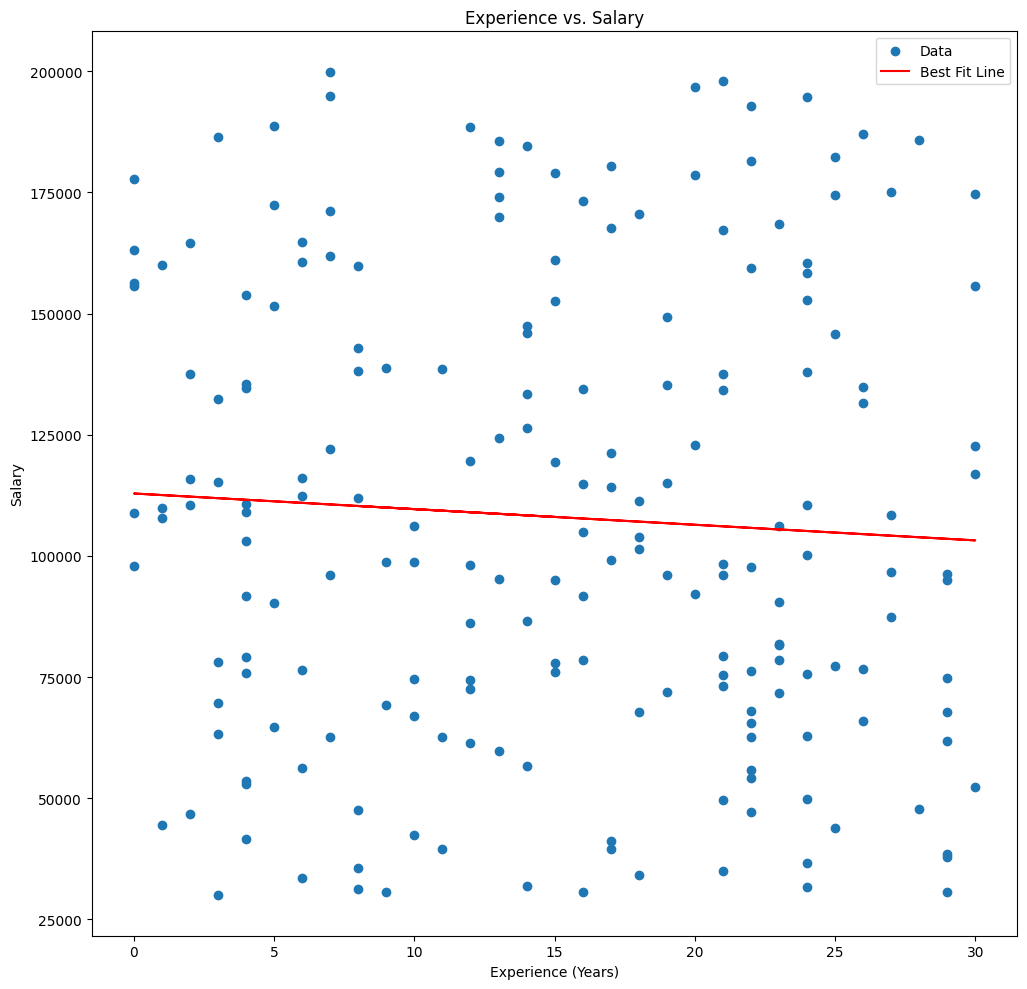

In [3348]:
plt.figure(figsize=(30,10))
plt.subplot(1, 3, 3)

plt.scatter(data['Experience (Years)'], data['Salary'], label='Data')
plt.plot(data['Experience (Years)'], m_experience * data['Experience (Years)'] + c_experience, 'r', label='Best Fit Line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Experience vs. Salary')
plt.legend()
plt.tight_layout()
plt.show()


------------------------------------------------------------------------------------------------------------------------------------------

### Rscore values

In [3349]:
# Calculate the predicted values
predicted_values = m_ed * data['Education_encoded'] + c_ed
# Calculate the mean of the dependent variable (Salary)
mean_salary = np.mean(data['Salary'])
# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)
# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)
# Calculate the R-squared value
r_squared = 1 - (rss / tss)
print(f"R-squared: {r_squared}")

R-squared: 0.0009263437348049353


In [3350]:
# Calculate the predicted values
predicted_values =  m_ed * data['Occupation_ID'] + c_ed
# Calculate the mean of the dependent variable (Salary)
mean_salary = np.mean(data['Salary'])
# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)
# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)
# Calculate the R-squared value
r_squared = 1 - (rss / tss)
print(f"R-squared: {r_squared}")

R-squared: -0.18183499102736778


In [3351]:
predicted_values =  m_experience * data['Experience (Years)'] + c_experience
# Calculate the total sum of squares (TSS)
tss = np.sum((data['Salary'] - mean_salary) ** 2)
# Calculate the residual sum of squares (RSS)
rss = np.sum((data['Salary'] - predicted_values) ** 2)
# Calculate the R-squared value
r_squared = 1 - (rss / tss)
print(f"R-squared: {r_squared}")

R-squared: 0.003463147394885513



The R-squared value on 'Experience (Years)' is very close to zero (0.0035). This indicates that the linear regression model applied to the original data does a poor job of explaining the variance in the salary. The model does not fit the data well, and Experience in this case doesn't seem to be a good predictor of the salary.

The R-squared value is negative (-0.1818). A negative R-squared suggests that the model is a poor fit for the data. In this case, it indicates that Occupation_ID is not a meaningful variable to predict salary. 


The R-squared value is very close to zero (0.0009). Similar to the Education_encoded is also not very related to salary
Although the Experience column has highest value of R2 as compared to either of them  , and can be considered as a better performing OLS model to predict value of salary ( slightly better ) than either of them

### 3. ⟨ 2 Marks ⟩ Use above mentioned dependent and independent variables to perform a multiple linear regression and compare its performance with polynomial regression. Comment your observation

In [3352]:
data = pd.read_csv('modified_salary_data.csv')  


In [3353]:
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values


In [3354]:
split_ratio = 0.8
split_index = int(split_ratio * len(X))


In [3355]:

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [3356]:
X_train_with_bias = np.c_[np.ones((len(X_train), 1)), X_train]  # Add bias term
weights = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)
linear_pred = X_test.dot(weights[1:]) + weights[0]


In [3357]:
rss = ((linear_pred - y_test) ** 2).sum()
tss = ((y_test - y_test.mean()) ** 2).sum()
linear_r2 = 1 - (rss / tss )



In [3358]:
print("Multiple Linear Regression:")
print("Mean Squared Error:", ((linear_pred - y_test)**2).mean() )
print("R-squared:", linear_r2)



Multiple Linear Regression:
Mean Squared Error: 2071454916.014295
R-squared: -0.013872475060773048


### Function for polynomial degree

In [3359]:
def add_polynomial_features(X, degree):
    # Create an array to hold the polynomial features
    X_poly = np.zeros((X.shape[0], X.shape[1] * degree))  # Initialize an array of zeros

    # Iterate through each feature and compute the polynomial features
    for i in range(X.shape[1]):
        for j in range(degree):
            X_poly[:, i * degree + j] = X[:, i] ** (j + 1)  # Feature raised to the (j+1)-th power

    return X_poly


In [3360]:
X_tt = np.array([[1, 2], [3, 4]])
degree = 5
X_poly = add_polynomial_features(X_tt, degree)
print(X_poly)


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 2.000e+00 4.000e+00
  8.000e+00 1.600e+01 3.200e+01]
 [3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02 4.000e+00 1.600e+01
  6.400e+01 2.560e+02 1.024e+03]]


In [3361]:
degree = 3

In [3362]:
X_train_poly = add_polynomial_features(X_train, degree)
X_test_poly = add_polynomial_features(X_test, degree)

In [3363]:
print(X_train_poly)

[[1.0000e+00 1.0000e+00 1.0000e+00 ... 1.0000e+00 1.0000e+00 1.0000e+00]
 [2.0000e+00 4.0000e+00 8.0000e+00 ... 2.0000e+00 4.0000e+00 8.0000e+00]
 [2.0000e+00 4.0000e+00 8.0000e+00 ... 3.0000e+00 9.0000e+00 2.7000e+01]
 ...
 [2.0000e+00 4.0000e+00 8.0000e+00 ... 8.0000e+00 6.4000e+01 5.1200e+02]
 [5.0000e+00 2.5000e+01 1.2500e+02 ... 1.2000e+01 1.4400e+02 1.7280e+03]
 [6.0000e+00 3.6000e+01 2.1600e+02 ... 3.3000e+01 1.0890e+03 3.5937e+04]]


#### Perform polynomial regression


In [3364]:
X_train_with_bias = np.c_[np.ones((len(X_train_poly), 1)), X_train_poly]  # Add bias term
weights = np.linalg.inv(X_train_with_bias.T.dot(X_train_with_bias)).dot(X_train_with_bias.T).dot(y_train)
poly_pred = X_test_poly.dot(weights[1:]) + weights[0]


In [3365]:
poly_rss = ((poly_pred - y_test) ** 2).sum()
poly_tss = ((y_test - y_test.mean()) ** 2).sum()
poly_r2 = 1 - (poly_rss / poly_tss)


In [3366]:
print("Polynomial Regression:")
mse =  ((poly_pred - y_test) ** 2).mean()
print("Mean Squared Error:", mse)
print("R-squared:", poly_r2)


Polynomial Regression:
Mean Squared Error: 2206366032.6425915
R-squared: -0.07990464726576985


Multiple Linear Regression:

Mean Squared Error (MSE): 2,071,454,916.01 (approximately 2.07 billion)

R-squared (R2): -0.0139 (approximately -0.014)

Observation:

The MSE represents the average squared difference between the predicted and actual values in the Multiple Linear Regression model.

The R-squared value indicates the proportion of the variance in the dependent variable that is explained by the independent variables.
In this case, both the MSE and R2 values are not favorable. The high MSE suggests that the model's predictions have a large spread of errors from the actual values. 

The negative R2 value indicates that the model doesn't explain the variance in the dependent variable well; it might be even worse than a horizontal line.

Polynomial Regression:

Mean Squared Error (MSE): 2,206,366,032.64 (approximately 2.21 billion)

R-squared (R2): -0.0799 (approximately -0.080)

Observation:

Polynomial Regression typically tries to capture nonlinear relationships by introducing polynomial features.

In this case, the MSE and R2 values are also not favorable.
The MSE is still high, indicating that the model's predictions have a significant error spread. The negative R2 value suggests that the polynomial regression model doesn't explain the variance in the dependent variable well either.

In both cases, it seems that the models are not performing well on the dataset. The negative R-squared values suggest that the models are not a good fit for the data, and the high MSE values indicate that their predictions have substantial errors.



-----------------------------------------------------------------------------------------------------------------------------------------

### 4. ⟨ 3 Marks ⟩ Identify all relevant data for salary prediction and perform principal component analysis (PCA) on the data, and again perform linear regression on new transformed data and compare results with above two methods. Comment your observation.

In [3367]:
numeric_features = ['Experience (Years)', 'Education_encoded' , 'Occupation_ID']
target_variable = 'Salary'

In [3368]:
numeric_data = data[numeric_features + [target_variable]]


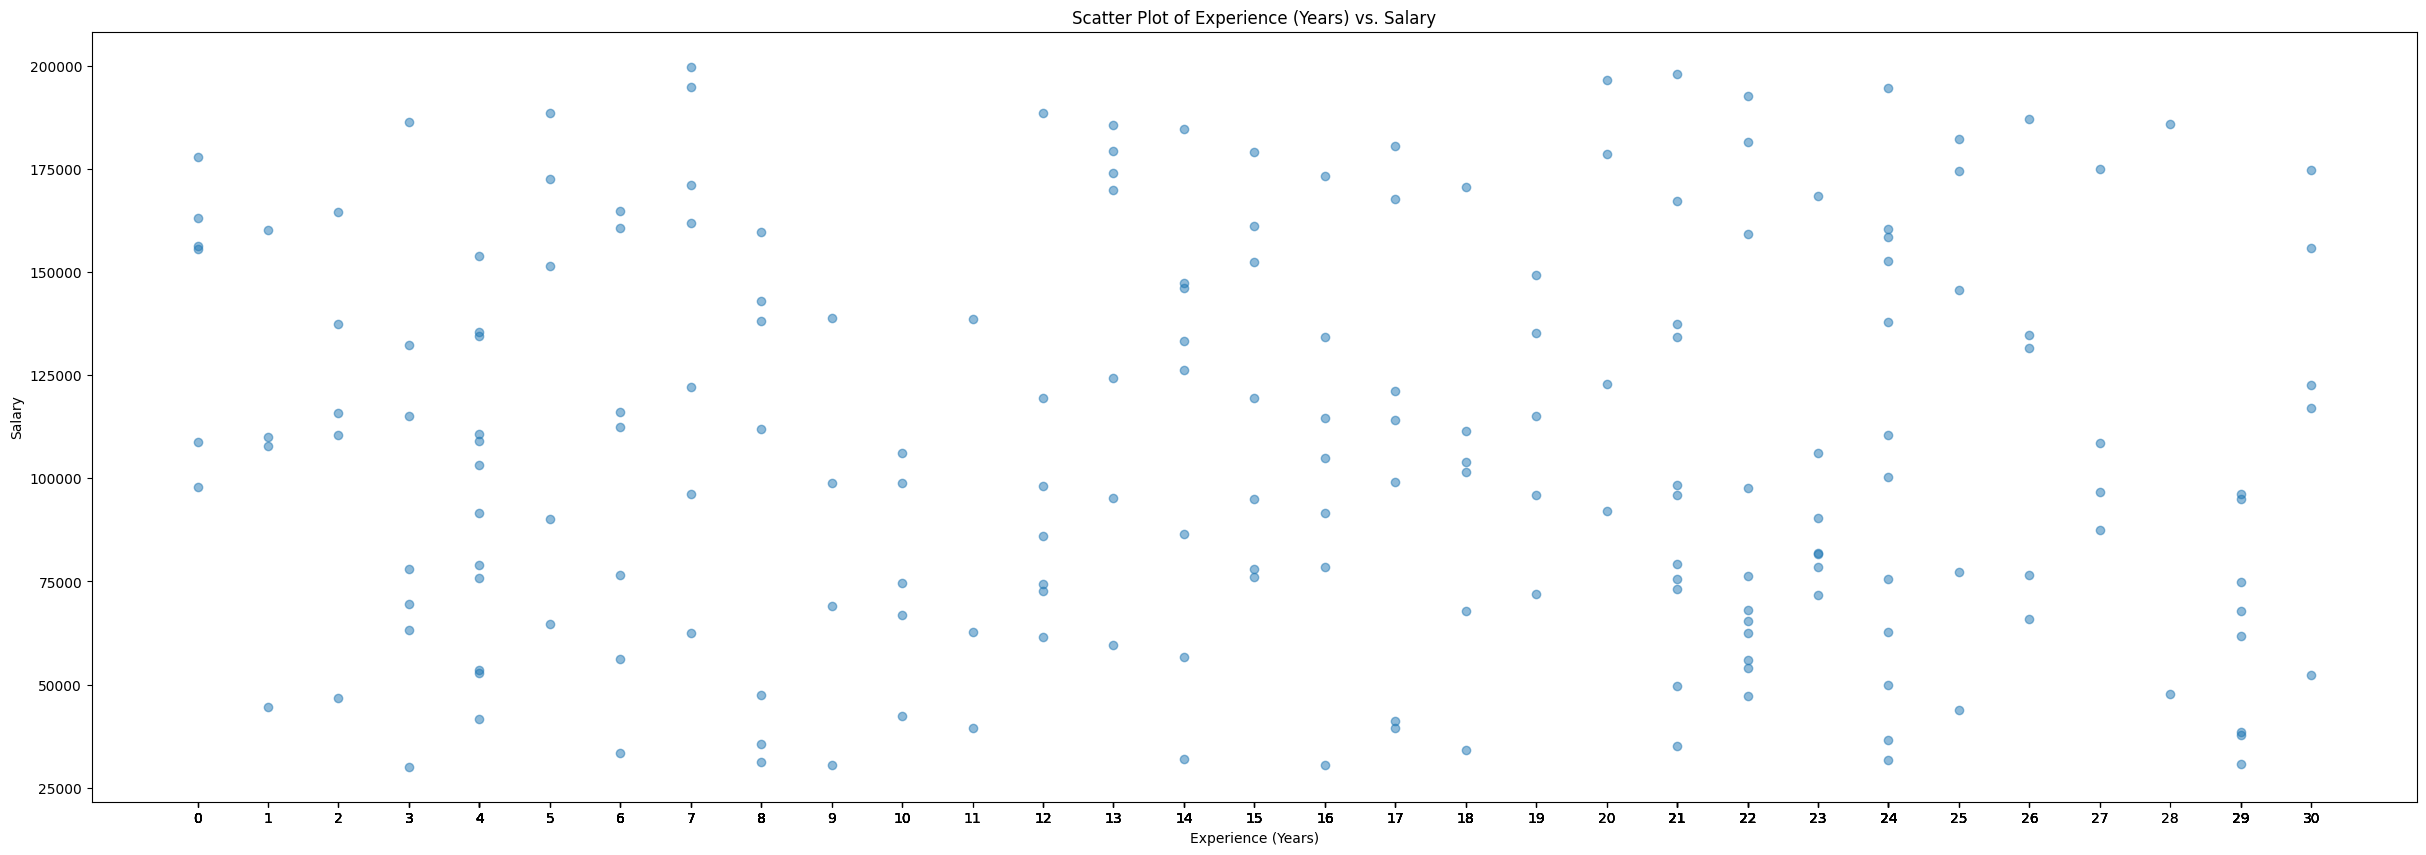

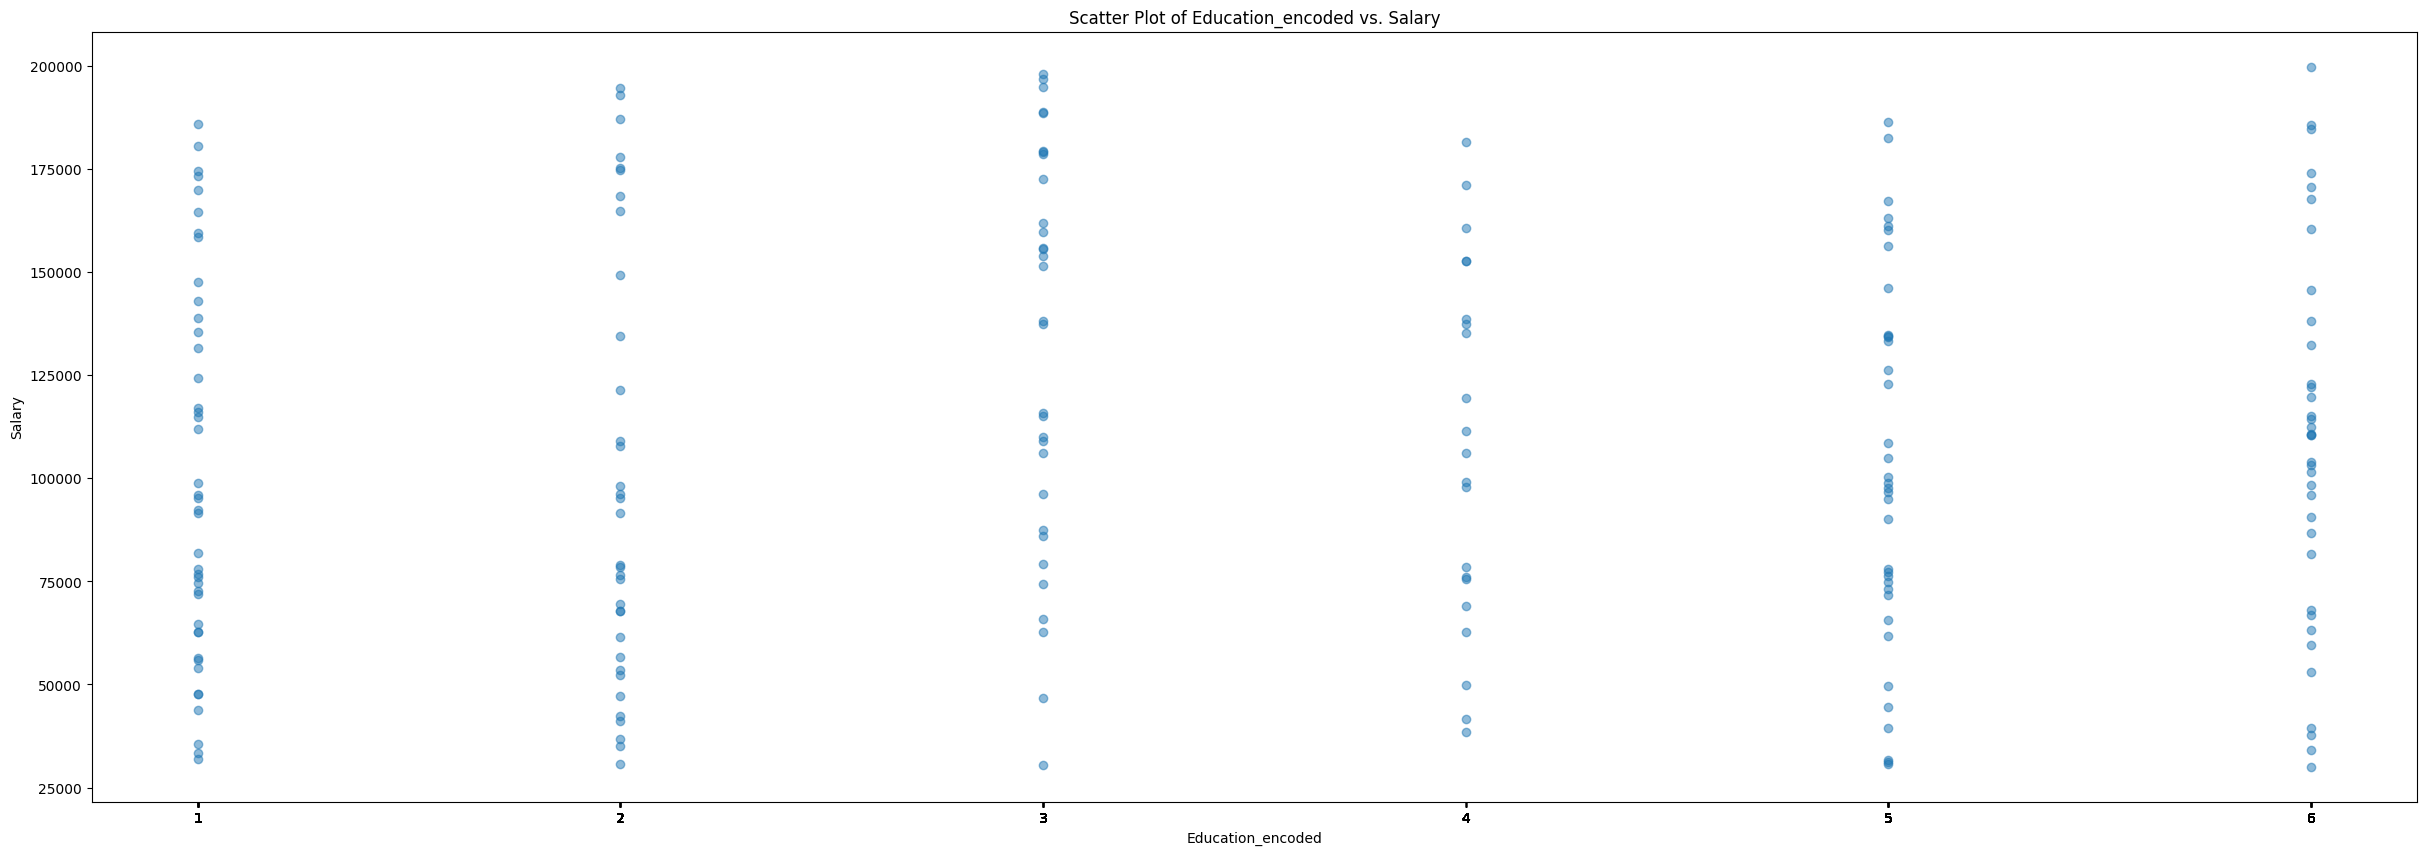

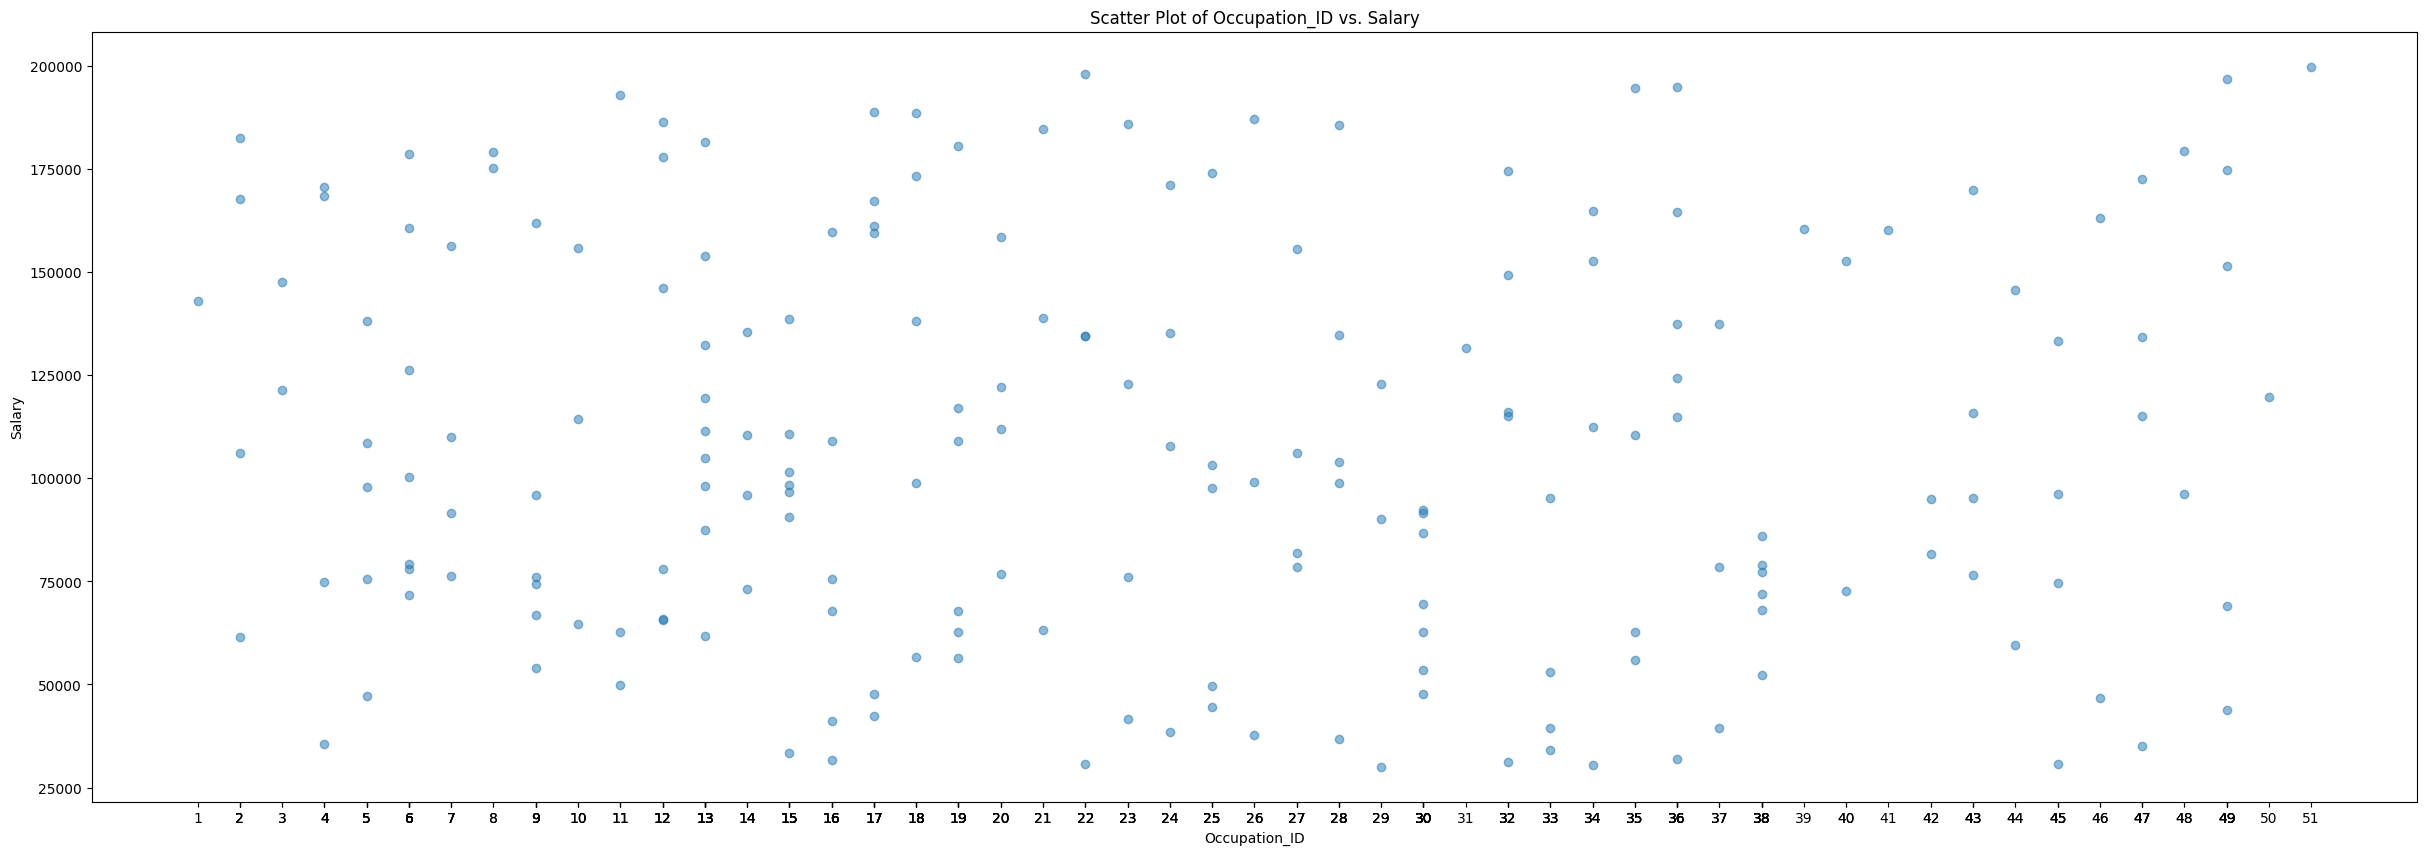

In [3369]:
for feature in numeric_features:
    plt.figure(figsize=(30,10))
    plt.scatter(numeric_data[feature], numeric_data[target_variable], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.xticks(numeric_data[feature])
    plt.title(f'Scatter Plot of {feature} vs. {target_variable}')
    plt.show()


In [3370]:

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Calculate the correlation between numeric features and Salary
correlation_with_salary = correlation_matrix[target_variable]

# Print the correlation values
print("Correlation between numeric features and Salary:")
print(correlation_with_salary)


Correlation between numeric features and Salary:
Experience (Years)   -0.058849
Education_encoded     0.030436
Occupation_ID        -0.032712
Salary                1.000000
Name: Salary, dtype: float64


### 3 Marks ⟩ Identify all relevant data for salary prediction and perform principal component analysis (PCA) on the data, and again perform linear regression on new transformed data and compare results with above two methods. Comment your observation.

## Ensure no missing values

#### Step 1: Identify Relevant Data

###### To perform PCA for salary prediction, you need a dataset that includes both features and the target variable (salary). The relevant data would typically include:
###### Features related to the individual's qualifications, experience, job role, location, etc.
###### The target variable, which is the salary.
###### Ensure that the data is preprocessed, including handling missing values, encoding categorical variables, and scaling if necessary.


In [3371]:
missing_values_X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].isnull().sum()

# Check for missing values in 'y'
missing_values_y = data['Salary'].isnull().sum()

print("Missing values in X:")
print(missing_values_X)

print("\nMissing values in y:")
print(missing_values_y)


Missing values in X:
Education_encoded     0
Experience (Years)    0
Occupation_ID         0
dtype: int64

Missing values in y:
0


#### Before applying PCA, it's essential to standardize or normalize the data to ensure that all features have the same scale. This step is important because PCA is sensitive to the scale of the data.
##### Since first name and last name are not relevant to salary removing
#### Overall, based on the correlation coefficients, none of these numeric features ('Experience (Years)', 'Education_encoded', 'Occupation_ID') has a strong linear correlation with 'Salary'. The relationships are weak and close to zero, suggesting that these individual features alone may not be strong predictors of salary.



In [3372]:
X = data[['Education_encoded', 'Experience (Years)', 'Occupation_ID']].values
y = data['Salary'].values

#### Step 1: Standardize the data (mean=0, std=1)

In [3373]:
# Step 1: Standardize the data (mean=0, std=1)
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_scaled = (X - mean) / std_dev

#### Step 2: Calculate the covariance matrix


In [3374]:
cov_matrix = np.cov(X_scaled, rowvar=False)


#### Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix


In [3375]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


### Step 4: Sort eigenvalues and eigenvectors in descending order


In [3376]:

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


#### Step 5: Project the data onto the selected eigenvectors


In [3377]:

# Step 6: Project the data onto the selected eigenvectors
X_pca = np.dot(X_scaled, eigenvectors)


In [3378]:
from numpy.linalg import inv

### Add a bias term to the PCA-transformed data


In [3379]:
X_pca_bias = np.column_stack([X_pca, np.ones(X_pca.shape[0])])


In [3380]:
# Perform linear regression on the PCA-transformed data
beta = np.dot(np.dot(inv(np.dot(X_pca_bias.T, X_pca_bias)), X_pca_bias.T), y)


In [3381]:
# Predict using the linear regression model
y_pred_pca_manual = np.dot(X_pca_bias, beta)


In [3382]:
# Calculate MSE and R-squared
mse_pca_manual = np.mean((y - y_pred_pca_manual) ** 2)
ssr_pca_manual = np.sum((y - y_pred_pca_manual) ** 2)
sst_pca_manual = np.sum((y - np.mean(y)) ** 2)
r2_pca_manual = 1 - (ssr_pca_manual / sst_pca_manual)

In [3383]:
print("Linear Regression on PCA-transformed Data (Manual PCA):")
print("MSE:", mse_pca_manual)
print("R-squared:", r2_pca_manual)


Linear Regression on PCA-transformed Data (Manual PCA):
MSE: 2245773610.8289256
R-squared: 0.005855813055619219


Manual PCA with Linear Regression:
MSE: 2,245,773,611 (approximately 2.25 billion)
R-squared (R2): 0.0059

Multiple Linear Regression:
MSE: 2,071,454,916 (approximately 2.07 billion)
R-squared (R2): -0.014

Polynomial Regression:
MSE: 2,206,366,033 (approximately 2.21 billion)
R-squared (R2): -0.080

Observations:

Among the three models, the Manual PCA with Linear Regression has the highest R-squared value, indicating that it explains the variance in the dependent variable (salary) better than the other two models. However, the R-squared value is still quite low, suggesting that the model's ability to explain salary variance is limited.

The Multiple Linear Regression model has the lowest R-squared value and a relatively high MSE, indicating that it performs the worst among the three models. It neither explains the variance well nor provides accurate predictions.

The Polynomial Regression model falls between the other two models in terms of R-squared and MSE but still has a negative R-squared value, indicating that it's not a good fit for the data.

Overall, all three models seem to struggle to capture the underlying patterns in the data effectively. The fact that all models have relatively high MSE and, in the case of Multiple Linear Regression and Polynomial Regression, negative R-squared values suggests that the features and modeling approaches used may not be suitable for accurately predicting salary in this dataset.



#### 5. ⟨ 3 Marks ⟩ Check for orthogonality in the relevant data matrix if not make them orthogonal and then perform multiple regression and compare the results with above results and comment your observation.

In [3384]:
relevant_data_matrix = data[numeric_features].values


In [3385]:
num_columns = relevant_data_matrix.shape[1]

# Initialize a boolean variable to check orthogonality
all_combinations_orthogonal = True

# Check dot products for all combinations
for i in range(num_columns):
    for j in range(i + 1, num_columns):
        dot_product = np.dot(relevant_data_matrix[:, i], relevant_data_matrix[:, j])
        
        # Check if the dot product is approximately 0 (within a small tolerance)
        tolerance = 1e-10  # Adjust this tolerance as needed
        is_orthogonal = abs(dot_product) < tolerance
        
        if not is_orthogonal:
            all_combinations_orthogonal = False
            break

# Print the result
if all_combinations_orthogonal:
    print("All combinations of columns are orthogonal.")
else:
    print("Not all combinations of columns are orthogonal.")


Not all combinations of columns are orthogonal.


In [3386]:
dot_product_01 = np.dot(relevant_data_matrix[:, 0], relevant_data_matrix[:, 1])

# Calculate the dot product between column 0 and column 2
dot_product_02 = np.dot(relevant_data_matrix[:, 0], relevant_data_matrix[:, 2])

# Calculate the dot product between column 1 and column 2
dot_product_12 = np.dot(relevant_data_matrix[:, 1], relevant_data_matrix[:, 2])

# Print the results
print("Dot Product between Column 0 and Column 1:", dot_product_01)
print("Dot Product between Column 0 and Column 2:", dot_product_02)
print("Dot Product between Column 1 and Column 2:", dot_product_12)


Dot Product between Column 0 and Column 1: 10275
Dot Product between Column 0 and Column 2: 69260
Dot Product between Column 1 and Column 2: 16243


In [3387]:
orthogonalized_matrix = np.zeros_like(relevant_data_matrix, dtype=float)

# Orthogonalize the first column (no need to subtract anything)
orthogonalized_matrix[:, 0] = relevant_data_matrix[:, 0]

# Orthogonalize the remaining columns relative to the previous columns
for i in range(1, relevant_data_matrix.shape[1]):
    v = relevant_data_matrix[:, i].astype(float)  # Current column (cast to float)
    for j in range(i):
        u = orthogonalized_matrix[:, j]  # Previously orthogonalized columns
        projection = np.dot(v, u) / np.dot(u, u)
        v -= projection * u  # Subtract the projection from the current column

    orthogonalized_matrix[:, i] = v

# Now, orthogonalized_matrix contains the orthogonalized columns


In [3388]:
num_columns = orthogonalized_matrix.shape[1]

# Initialize a boolean variable to check orthogonality
all_combinations_orthogonal = True

# Check dot products for all combinations
for i in range(num_columns):
    for j in range(i + 1, num_columns):
        dot_product = np.dot(orthogonalized_matrix[:, i], orthogonalized_matrix[:, j])
        
        # Check if the dot product is approximately 0 (within a small tolerance)
        tolerance = 1e-10  # Adjust this tolerance as needed
        is_orthogonal = abs(dot_product) < tolerance
        
        if not is_orthogonal:
            all_combinations_orthogonal = False
            break

# Print the result
if all_combinations_orthogonal:
    print("All combinations of columns are orthogonal.")
else:
    print("Not all combinations of columns are orthogonal.")


All combinations of columns are orthogonal.


In [3389]:
# Add a column of ones to the orthogonalized_matrix for the intercept
ones_column = np.ones((orthogonalized_matrix.shape[0], 1))
X = np.hstack((ones_column, orthogonalized_matrix))

# Calculate the coefficients (parameters) using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Predict the target variable
y_pred = X.dot(coefficients)

# Calculate the Mean Squared Error (MSE)
mse = ((y - y_pred)**2).mean()

# Calculate the R-squared (R2) value
total_variance = ((y - y.mean())**2).sum()
explained_variance = ((y_pred - y.mean())**2).sum()
r2 = explained_variance / total_variance

# Print the results
print("After Orthogalising")
print("Coefficients:", coefficients)
print("MSE:", mse)
print("R-squared:", r2)


After Orthogalising
Coefficients: [113532.24885289   -355.14034662    339.93935826   -134.70808452]
MSE: 2245773610.8289256
R-squared: 0.005855813055619211


PCA Multiple Regression:

MSE: Approximately 2.25 billion
R-squared (R2): 0.0059

Observation: This model has the highest R-squared value among the models, indicating a slightly better ability to explain salary variance compared to the others. However, the R-squared value is still low, suggesting limited explanatory power.


Multiple Linear Regression (Original Data):
MSE: Approximately 2.07 billion
R-squared (R2): -0.014
Observation: This model performs the worst, with a negative R-squared value, indicating it doesn't explain salary variance well and may perform even worse than a horizontal line.


Polynomial Regression (Original Data):
MSE: Approximately 2.21 billion
R-squared (R2): -0.080
Observation: The Polynomial Regression model falls between the other models but still has a negative R-squared value, indicating it's not a good fit for the data.

Orthogonalized Linear Regression (Orthogonalized Data):
MSE: Approximately 2.25 billion (approx)
R-squared (R2): 0.0059(approx.s)
Observation: This model performs similarly to PCA Multiple Regression, with comparable R-squared and MSE values.
General Observations:

All models exhibit low R-squared values, indicating that they do not effectively explain the variance in salary.
All models have relatively high MSE values, suggesting significant prediction errors.
The performance of the PCA with Linear Regression model is similar to PCA Multiple Regression, indicating that orthogonalization didn't significantly improve the model's performance.
In summary, none of the models, whether using PCA or not, perform well in explaining salary variance in this dataset. The low R-squared values and high MSE values suggest that the features and modeling approaches used may not be suitable for accurate salary prediction. 






------------------------------------------------------------------------------------------------------------------------------------------

#### 6. ⟨ 2 Marks ⟩ Plot original ”Experience” and orthogonalized ”Experience” variable as scatter plot and comment on changes in the variable data after orthogonalization.

In [3390]:
print(data['Experience (Years)'] )


0       8
1      12
2      17
3       8
4      24
       ..
195    29
196    19
197    24
198     5
199    15
Name: Experience (Years), Length: 200, dtype: int64


### It appears that there are no highly correlated features in your dataset, as indicated by the output: "No highly correlated features found." This means that the features you selected ('Experience (Years)', 'Education_encoded', 'Occupation_ID') do not exhibit strong linear correlations with each other.



In [3391]:
print(data["Experience (Years)"].values)

[ 8 12 17  8 24  3  1 15  7  5 24 23 14  4 21 26 21 19 18 21  5 17 18 16
  6 17 24 22 14 10 12 21 30 20 19 21 26 24 30 23 15 24  1  3 28 26 19  4
 29 18 17  6  2  2 23 27  4 13 13 21  8 24 22 29  1 10  8 22  7 24  8 17
 12  6  1  4 14 23 11  6 28  4 29 29  4 25  9 24 16  7  0 22 11 24  3  2
  5 12 12 22 16 22 15 25 10 29 10 19  4  4 27 13 14  7  3 30 26 21 23  0
 20  0 15 25  6  0 24 18 13 21  3  4 13 13 23  5 13 21  7  0 16 11 14 22
  2 12  2 14  8  8  7  4 24  9 16 18 22 27 22 18  3  4 25 12 22 14 16 10
 20 30  6 17 21 26 15 14 25  9  4 21 23 16  9  7 20  3 29 30  6 17 29  0
 22 27 15 29 19 24  5 15]


In [3392]:
print(data["Experience (Years)"].var())


75.62288944723618


In [3393]:
print(data["Experience (Years)"].mean())


15.015


In [3394]:
print(orthogonalized_matrix[:, 1])

[-0.3668335  -0.05025025 -0.90452119 -0.3668335  -2.10050051  0.48743744
  2.82914581  0.43718718  1.80402069  0.14572906 -0.10050051 -1.92964632
  2.60804137  2.31658325  2.41206206 -1.44220888  2.41206206 -2.24622957
  2.92462462  0.41206206  2.14572906  3.09547881  2.92462462 -1.733667
 -0.02512513 -0.90452119 -3.10050051 -2.75879213  3.60804137  0.29145812
  0.94974975 -0.58793794 -0.12562563 -0.41708376  0.75377043  1.41206206
 -2.44220888 -3.10050051 -2.12562563  0.07035368  2.43718718 -2.10050051
  4.82914581  5.48743744 -3.78391726 -3.44220888 -1.24622957  0.31658325
  0.04522855  0.92462462  2.09547881  0.97487487  5.65829162  0.65829162
  1.07035368  0.38693693  5.31658325 -0.22110444  3.77889556 -0.58793794
 -0.3668335  -2.10050051  1.24120787 -2.95477145  1.82914581  4.29145812
 -0.3668335   2.24120787  2.80402069  1.89949949  3.6331665  -1.90452119
 -1.05025025  2.97487487  4.82914581  5.31658325 -1.39195863  2.07035368
  1.12060393  0.97487487 -3.78391726  3.31658325 -0.9

In [3395]:
print(orthogonalized_matrix[:, 1].var())

5.445504531410949


In [3396]:
print(orthogonalized_matrix[:, 1].mean())

0.8496243702090155


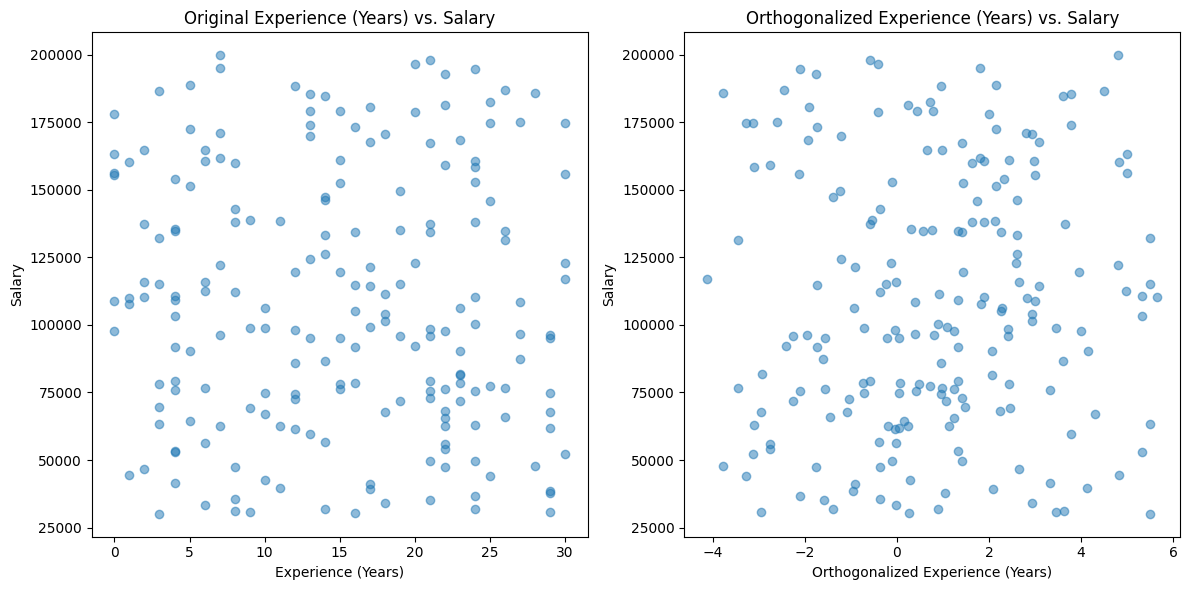

In [3397]:
original_Experience = data["Experience (Years)"].values

# Create scatter plots for both versions
plt.figure(figsize=(12, 6))

# Scatter plot for original "Experience (Years)"
plt.subplot(1, 2, 1)
plt.scatter(original_Experience, data["Salary"].values, alpha=0.5)
plt.title("Original Experience (Years) vs. Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")

# Scatter plot for orthogonalized "Experience (Years)" (assuming it's the second column in orthogonalized_matrix)
plt.subplot(1, 2, 2)
plt.scatter(orthogonalized_matrix[:, 1], data["Salary"].values, alpha=0.5)
plt.title("Orthogonalized Experience (Years) vs. Salary")
plt.xlabel("Orthogonalized Experience (Years)")
plt.ylabel("Salary")

plt.tight_layout()
plt.show()


Variance of "Experience (Years)": 75.62288944723618
Variance of orthogonalized "Experience": 5.445504531410949

The variance of the orthogonalized "Experience" column is significantly lower than the variance of the original "Experience (Years)" column.

This reduction in variance is expected after orthogonalization, as one of the primary goals of orthogonalization is to decorrelate variables and reduce multicollinearity. Lower variance suggests that the orthogonalized variable has fewer fluctuations and is less sensitive to changes.

Mean of "Experience (Years)": 15.015
Mean of orthogonalized "Experience": 0.8496243702090155

The mean of the orthogonalized "Experience" column is closer to zero, as orthogonalization aims to center the data around zero. This is another expected outcome of the orthogonalization process.

Overall, the orthogonalization process has reduced the variance and centered the data around zero for the "Experience" variable, which aligns with the goals of orthogonalization in linear regression modeling.






#### Unsupervised Learning